# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.0 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM progens

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 104652 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'april_cell.labels'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T                        327
CD8 T                        171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
EI macrophage                 92
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
Immature B cell             1998
MEMP                          16
MEP                          269
MK                          1036
MPP lymphoid                  34
MPP myeloid 1                 46
MPP myeloid 2                 46
NKT                          137
Naive B cell                1423
Pre B progenitor           14234
Pre pro B progenitor        5428
Pro B progenitor            5530
Treg                          62
adipo-CAR                    359
arteriolar fibroblast         84
basophil                     13

In [6]:
adata = adata[adata.obs['cell.labels'].isin(["HSC", "MPP myeloid 1",  "MPP myeloid 2", "CMP", "GMP", 
                                             "MEMP", "MEP", "eo/baso/mast precursor", 
                                             "MPP lymphoid", "ELP"])].copy()

In [7]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CMP                        425
ELP                       1358
GMP                       1285
HSC                         92
MEMP                        16
MEP                        269
MPP lymphoid                34
MPP myeloid 1               46
MPP myeloid 2               46
eo/baso/mast precursor     175
dtype: int64

# Pre-process the data

In [8]:
# normalise count data 
sc.pp.normalize_total(adata)

In [9]:
# log the count data 
sc.pp.log1p(adata)

In [10]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [11]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Run dotplots

In [12]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].replace(["MPP myeloid 1", "MPP myeloid 2"], 
                                                            ["MPP myeloid", "MPP myeloid"])

adata.obs["cell.labels"] = adata.obs["cell.labels"].astype("category")
adata.obs["cell.labels"] = adata.obs["cell.labels"].cat.reorder_categories(["HSC", "MPP myeloid", "CMP", "GMP", 
                                                                            "MEMP", "MEP", "eo/baso/mast precursor", 
                                                                            "MPP lymphoid", "ELP"])

In [13]:
genes = ['MLLT3', 'AVP', 'CLEC9A', 'HLF', 'HOPX', 'PRSS57', 'CALR', 'CLEC11A', 'MPO', 'LYZ', 'CEBPD', 'TESPA1', 'IL1B', 
        'GATA1', 'EPCAM', 'PLEK', 'GATA2', 'CSF2RB', 'CLC', 'IL7R', 'IGHM']

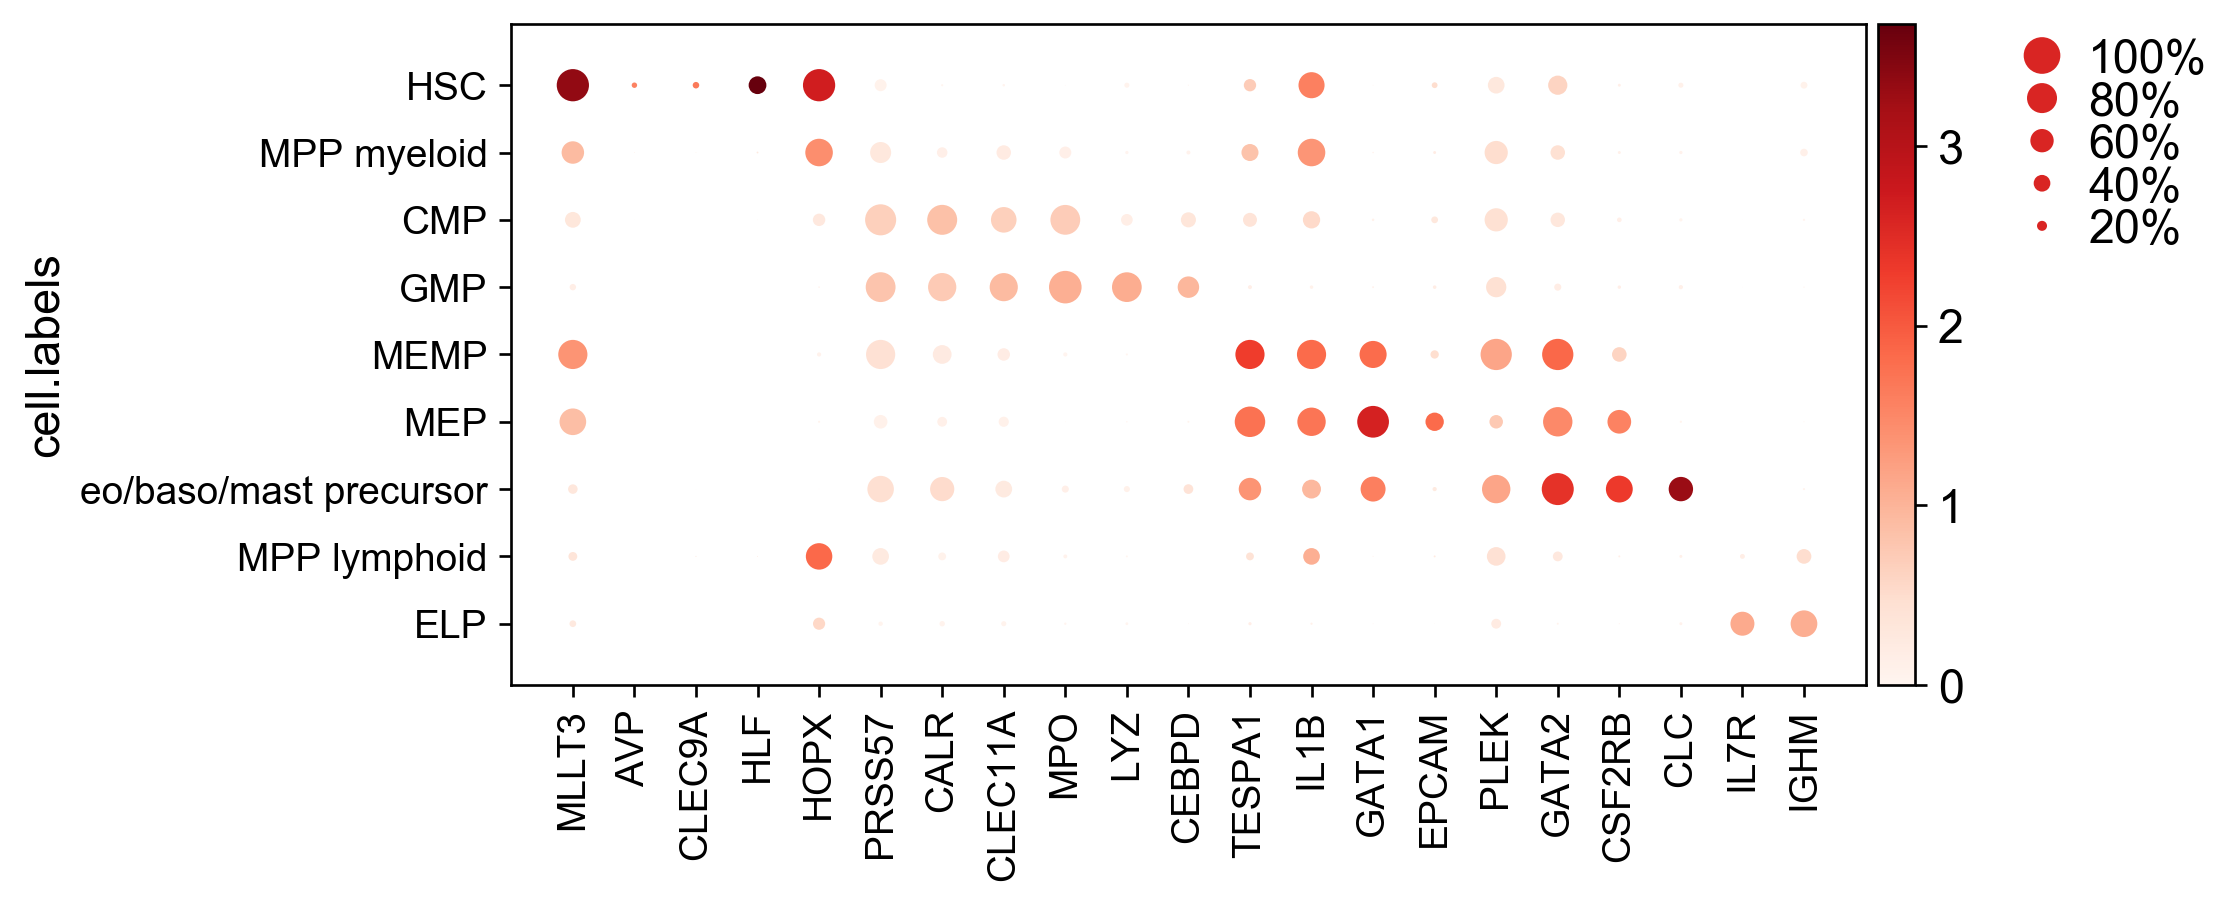

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[7.35, 0, 0.2, 0.5, 0.25])

In [14]:
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.pl.dotplot(adata, var_names=genes, groupby="cell.labels", use_raw=False, save="figs4c_progen_dotplot_20200708.pdf")

# Save the data

In [15]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [16]:
adata.X

<3746x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 12167903 stored elements in Compressed Sparse Row format>

In [17]:
adata.raw.X

<3746x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 14156608 stored elements in Compressed Sparse Row format>

In [18]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs4c_progen_dotplot_20200708.h5ad")